In [223]:
import numpy as np
n = 3
m = 4
env = np.zeros((n, m))
pol = np.empty((n, m), dtype='object')

walls = {
    (1,1)
}
rewards = {
    (0, 3),
    (1, 3),
}

env[0][3] = 1
env[1][3] = -1
nois = 0.2
gamma = 0.9
iter = 100
print("env:")
print(env)

env:
[[ 0.  0.  0.  1.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  0.  0.]]


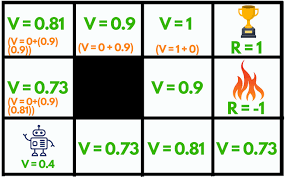

In [224]:
dir = {
    "left": (0, -1),
    "right": (0, 1),
    "up": (-1, 0),
    "down": (1, 0)
}

In [225]:
def valid(x, y):
    if x < 0 or y < 0 or x >= n or y >= m: return False
    if (x, y) in walls: return False
    return True



In [226]:
def print_value():
    for i in range(n):
        s = "|"
        for j in range(m):
            s += str(env[i][j])[0:4]+ " | "
        print(s)

In [227]:
def print_policy():
    for i in range(n):
        s = "|"
        for j in range(m):
            s += str(pol[i][j]) + "|  "
        print(s)

<!-- The Bellman equation is a fundamental concept in dynamic programming and reinforcement learning. It was first formulated by Richard Bellman in the 1950s. The equation expresses a key principle of optimality in decision-making over time.

In its simplest form, the Bellman equation describes the relationship between the value of being in a particular state and the value of taking a particular action from that state. It can be expre mathematically as follows:-->ssed 

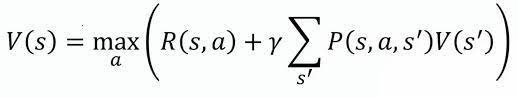


In [231]:
#V(s) is the value of being in state 
#R(s,a) is the immediate reward received after taking action a in state
#γ is the discount factor, representing the importance of future rewards compared to immediate rewards,
# p is the probability of transitioning to state  from state s after taking action
#max represents taking the action that maximizes the expression inside the brackets

In [228]:

def get_state_of_certain_move(x, y, d):
    divide_noise = 0
    for i in dir:
        newx = x + dir[i][0]
        newy = y + dir[i][1]
        if not valid(newx, newy) : continue
        divide_noise += 1
    sum = 0  
    
    for i in dir:
        newx = x + dir[i][0]
        newy = y + dir[i][1]
        if not valid(newx, newy) : continue
        if i == d: sum += (1 - noise) * gamma * env[newx][newy]
        else: sum += (noise / (divide_noise - 1)) * gamma * env[newx][newy]

    return sum

def get_state_value(x, y):
    qState = {}
    for d in dir:
        qState[d] = get_state_of_certain_move(x, y, d)
    return qState
        
        

In [229]:
for _ in range(5):
    print_value()
    print("\n--------------------------------\n")
    for i in range(n):
        for j in range(m):
            if (i, j) in walls or (i, j) in rewards: continue
            qst = get_state_value(i, j)
            max_value = max(qst.values())
            env[i][j] = max_value
            pol[i][j] = max(qst, key=qst.get)
print_policy()

|0.0 | 0.0 | 0.0 | 1.0 | 
|0.0 | 0.0 | 0.0 | -1.0 | 
|0.0 | 0.0 | 0.0 | 0.0 | 

--------------------------------

|0.0 | 0.0 | 0.72 | 1.0 | 
|0.0 | 0.0 | 0.42 | -1.0 | 
|0.0 | 0.0 | 0.30 | 0.04 | 

--------------------------------

|0.0 | 0.51 | 0.80 | 1.0 | 
|0.0 | 0.0 | 0.51 | -1.0 | 
|0.0 | 0.22 | 0.39 | 0.10 | 

--------------------------------

|0.37 | 0.64 | 0.82 | 1.0 | 
|0.26 | 0.0 | 0.53 | -1.0 | 
|0.23 | 0.32 | 0.42 | 0.12 | 

--------------------------------

|0.51 | 0.68 | 0.83 | 1.0 | 
|0.41 | 0.0 | 0.54 | -1.0 | 
|0.35 | 0.37 | 0.43 | 0.13 | 

--------------------------------

|right|  right|  right|  None|  
|up|  None|  up|  None|  
|up|  right|  up|  left|  
